<a href="https://colab.research.google.com/github/musfiqur552608/Gamer-Prediction/blob/master/Gaming_effect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Starting

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
df = pd.read_csv('gdrive/My Drive/Colab Notebooks/Online Gaming.csv')

In [ ]:
df.head(10)

,Timestamp,age,gender,occupation,addicted,pyears,gamet,onlinet,studyt,sleept,familyt,friendt,problem
0,10/18/2020 11:17:45,19,Female,Bachelor Degree,No,Less than 1 year,Less than 1 hour,4 hour,4 hour,6 hour,4 hour,less than 1 hour,"Headache, Eye problems, Eating problem, Losing..."
1,10/18/2020 11:20:08,19,Male,12th class,No,5 year,5 hour,5 hour,2 hour,6 hour,2 hour,4 hour,Other
2,10/18/2020 11:21:46,21,Female,Bachelor Degree,No,Less than 1 year,Less than 1 hour,1 hour,2 hour,7 hour,More than 12 hours,2 hour,No problem
3,10/18/2020 11:21:48,21,Female,Bachelor Degree,No,Less than 1 year,Less than 1 hour,4 hour,4 hour,6 hour,4 hour,1 hour,No problem
4,10/18/2020 11:22:00,22,Female,Bachelor Degree,No,2 year,2 hour,4 hour,5 hour,6 hour,1 hour,less than 1 hour,"Headache, Eye problems"
5,10/18/2020 11:26:35,21,Female,Bachelor Degree,No,1 year,Less than 1 hour,4 hour,3 hour,6 hour,2 hour,1 hour,Headache
6,10/18/2020 11:29:07,22,Female,Bachelor Degree,No,Less than 1 year,Less than 1 hour,7 hour,3 hour,8 hour,3 hour,2 hour,"Headache, Eye problems, Eating problem, Losing..."
7,10/18/2020 11:29:47,21,Female,Bachelor Degree,No,Less than 1 year,Less than 1 hour,8 hour,2 hour,5 hour,More than 12 hours,less than 1 hour,"Headache, Eye problems, Lack of sleep, Losing ..."
8,10/18/2020 11:39:14,23,Male,Bachelor Degree,Yes,6 year,4 hour,1 hour,4 hour,6 hour,3 hour,less than 1 hour,"Headache, Lack of sleep, Losing mood easily"
9,10/18/2020 11:47:16,21,Male,Bachelor Degree,Yes,4 year,5 hour,1 hour,1 hour,5 hour,2 hour,1 hour,No problem


In [ ]:
df.isnull().sum()

Timestamp     0
age           0
gender        0
occupation    0
addicted      0
pyears        0
gamet         0
onlinet       0
studyt        0
sleept        0
familyt       0
friendt       0
problem       0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f746b308990>]],
      dtype=object)

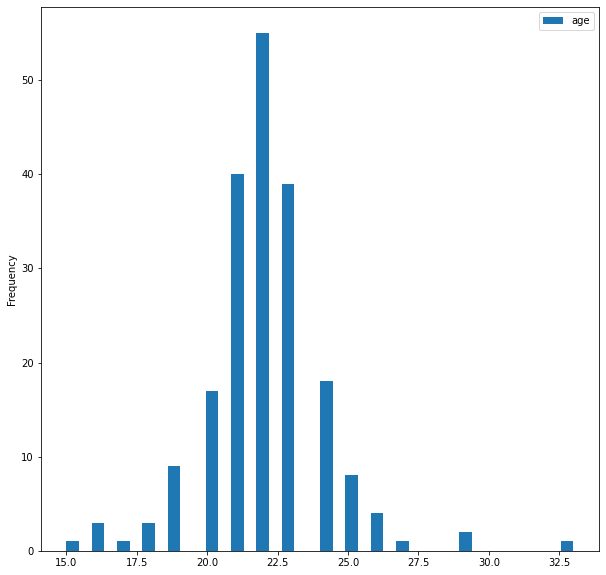

In [ ]:
df.plot.hist(subplots=True, layout=(1,1), figsize=(10, 10), bins=40)

In [ ]:
le = LabelEncoder()

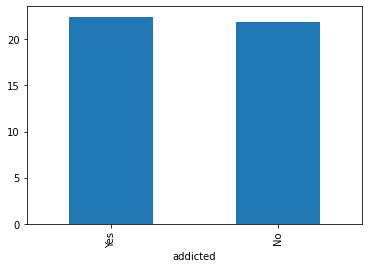

In [ ]:
df.groupby("addicted").age.mean().sort_values(ascending=False)[:5].plot.bar()

In [ ]:
df['age'] = le.fit_transform(df['age'])
df['gender'] = le.fit_transform(df['gender'])
df['occupation'] = le.fit_transform(df['occupation'])
df['pyears'] = le.fit_transform(df['pyears'])
df['gamet'] = le.fit_transform(df['gamet'])
df['onlinet'] = le.fit_transform(df['onlinet'])
df['studyt'] = le.fit_transform(df['studyt'])
df['sleept'] = le.fit_transform(df['sleept'])
df['familyt'] = le.fit_transform(df['familyt'])
df['friendt'] = le.fit_transform(df['friendt'])
df['problem'] = le.fit_transform(df['problem'])
df['addicted'] = le.fit_transform(df['addicted'])

In [ ]:
df.describe()

,age,gender,occupation,addicted,pyears,gamet,onlinet,studyt,sleept,familyt,friendt,problem
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,6.980198,0.712871,2.920792,0.272277,5.059406,7.732673,6.633663,4.831683,7.242574,6.633663,4.272277,23.440594
std,2.009828,0.453546,0.633763,0.446238,2.403653,4.524980,3.937883,3.600910,2.340551,4.452564,3.729688,11.808123
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,0.000000,3.000000,0.000000,3.000000,4.000000,4.000000,2.000000,7.000000,4.000000,2.000000,13.000000
50%,7.000000,1.000000,3.000000,0.000000,6.000000,11.000000,6.000000,4.000000,8.000000,5.000000,3.000000,26.500000
75%,8.000000,1.000000,3.000000,1.000000,7.000000,11.000000,9.000000,7.000000,9.000000,12.000000,10.000000,35.000000
max,14.000000,1.000000,5.000000,1.000000,9.000000,13.000000,13.000000,11.000000,12.000000,13.000000,10.000000,37.000000


In [ ]:
df.head(10)

,Timestamp,age,gender,occupation,addicted,pyears,gamet,onlinet,studyt,sleept,familyt,friendt,problem
0,10/18/2020 11:17:45,4,0,3,0,6,11,6,4,7,6,10,19
1,10/18/2020 11:20:08,4,1,1,0,4,6,7,2,7,4,4,37
2,10/18/2020 11:21:46,6,0,3,0,6,11,0,2,8,12,2,35
3,10/18/2020 11:21:48,6,0,3,0,6,11,6,4,7,6,0,35
4,10/18/2020 11:22:00,7,0,3,0,1,3,6,5,7,0,10,16
5,10/18/2020 11:26:35,6,0,3,0,0,11,6,3,7,4,0,11
6,10/18/2020 11:29:07,7,0,3,0,6,11,9,3,9,5,2,19
7,10/18/2020 11:29:47,6,0,3,0,6,11,10,2,6,12,10,22
8,10/18/2020 11:39:14,8,1,3,1,5,5,0,4,7,5,10,27
9,10/18/2020 11:47:16,6,1,3,1,3,6,0,0,6,4,0,35


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Timestamp   202 non-null    object
 1   age         202 non-null    int64 
 2   gender      202 non-null    int64 
 3   occupation  202 non-null    int64 
 4   addicted    202 non-null    int64 
 5   pyears      202 non-null    int64 
 6   gamet       202 non-null    int64 
 7   onlinet     202 non-null    int64 
 8   studyt      202 non-null    int64 
 9   sleept      202 non-null    int64 
 10  familyt     202 non-null    int64 
 11  friendt     202 non-null    int64 
 12  problem     202 non-null    int64 
dtypes: int64(12), object(1)
memory usage: 20.6+ KB


In [ ]:
 y = df['addicted']
 x = df.drop([ 'Timestamp','addicted'], axis=1)

In [ ]:
x

,age,gender,occupation,pyears,gamet,onlinet,studyt,sleept,familyt,friendt,problem
0,4,0,3,6,11,6,4,7,6,10,19
1,4,1,1,4,6,7,2,7,4,4,37
2,6,0,3,6,11,0,2,8,12,2,35
3,6,0,3,6,11,6,4,7,6,0,35
4,7,0,3,1,3,6,5,7,0,10,16
...,...,...,...,...,...,...,...,...,...,...,...
197,9,1,3,0,6,6,5,7,5,3,35
198,6,1,3,3,0,0,9,8,0,0,10
199,7,1,3,3,7,0,0,0,0,0,22
200,7,0,3,5,10,0,2,5,0,0,18


In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
197    0
198    0
199    1
200    1
201    1
Name: addicted, Length: 202, dtype: int64

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [ ]:
x_train

,age,gender,occupation,pyears,gamet,onlinet,studyt,sleept,familyt,friendt,problem
146,9,1,3,7,3,4,5,8,5,2,35
89,9,1,3,4,5,8,0,9,4,4,35
108,6,1,3,2,4,9,5,8,13,2,15
189,1,0,2,8,13,5,4,8,13,3,10
57,7,1,3,3,0,10,3,10,0,2,20
...,...,...,...,...,...,...,...,...,...,...,...
144,4,1,3,7,0,7,5,1,7,2,8
80,6,0,3,7,0,13,11,7,4,0,18
200,7,0,3,5,10,0,2,5,0,0,18
159,6,1,3,3,4,11,2,8,9,3,35


In [ ]:
y_train

146    0
89     0
108    1
189    0
57     0
      ..
144    0
80     1
200    1
159    0
179    0
Name: addicted, Length: 161, dtype: int64

In [ ]:
y_test

168    0
112    1
199    1
132    0
17     0
22     0
152    0
192    0
164    0
186    0
56     0
54     0
40     0
185    0
150    0
12     1
104    0
4      0
126    1
105    1
16     1
72     0
60     1
172    1
171    0
78     1
100    1
41     0
7      0
136    0
81     1
71     1
113    0
10     0
51     0
134    0
36     0
111    0
97     0
91     0
66     1
Name: addicted, dtype: int64

In [ ]:
cm_algorithms_name =[]
true_positive = []
false_negative = []
false_positive = []
true_negative = []


algorithm_name = []
test_accuracy_data = []
cross_validation_accuracy_data = []

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

## Linear Regression

In [ ]:
clf = LinearRegression()
clf.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
clf.score(x_train,y_train)

0.17068550530588378

In [ ]:
clf.score(x_test,y_test)

0.2624352586834955

In [ ]:
cross_val_score(clf, x, y, cv=10)

array([ 0.15282461, -0.38250859,  0.13764435,  0.12314922,  0.17005308,
        0.21693465, -0.25403921, -0.1964938 ,  0.16972044,  0.0730574 ])

In [ ]:
cross_val_score(clf, x, y, cv=5).mean()

0.0481477800232117

## Logistic Regression

In [ ]:
lo = LogisticRegression()
lo.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lo.score(x_train,y_train)

0.7329192546583851

In [ ]:
lo_test_accuracy=lo.score(x_test,y_test)
lo_test_accuracy

0.6829268292682927

In [ ]:
cross_val_score(lo, x, y, cv=10)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


array([0.76190476, 0.57142857, 0.65      , 0.65      , 0.7       ,
       0.85      , 0.5       , 0.65      , 0.7       , 0.65      ])

In [ ]:
lo_cross_val=cross_val_score(lo, x, y, cv=10).mean()
lo_cross_val

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.6683333333333333

In [ ]:
y_pred = lo.predict(x_test)
y_pred

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
tp, fn, fp, tn = confusion_matrix(y_test,y_pred, labels=(1,0)).ravel()

In [ ]:
graph = classification_report(y_test,y_pred, labels=(1,0))
print(graph)

              precision    recall  f1-score   support

           1       0.50      0.15      0.24        13
           0       0.70      0.93      0.80        28

    accuracy                           0.68        41
   macro avg       0.60      0.54      0.52        41
weighted avg       0.64      0.68      0.62        41



In [ ]:
cm_algorithms_name.append('Logistic Regrassion')
true_positive.append(tp)
false_negative.append(fn)
false_positive.append(fp)
true_negative.append(tn)


algorithm_name.append('Logistic Regrassion')
test_accuracy_data.append(lo_test_accuracy)
cross_validation_accuracy_data.append(lo_cross_val)

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
k = KNeighborsClassifier()
k.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
k.score(x_train,y_train)

0.8012422360248447

In [ ]:
knn_test_accuracy=k.score(x_test,y_test)
knn_test_accuracy

0.7317073170731707

In [ ]:
cross_val_score(k, x, y, cv=10)

array([0.66666667, 0.57142857, 0.7       , 0.8       , 0.8       ,
       0.75      , 0.6       , 0.55      , 0.65      , 0.65      ])

In [ ]:
knn_cross_val=cross_val_score(k, x, y, cv=10).mean()
knn_cross_val

0.6738095238095239

In [ ]:
y_pred = k.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
tp, fn, fp, tn = confusion_matrix(y_test,y_pred, labels=(1,0)).ravel()

In [ ]:
graph = classification_report(y_test,y_pred, labels=(1,0))
print(graph)

              precision    recall  f1-score   support

           1       0.75      0.23      0.35        13
           0       0.73      0.96      0.83        28

    accuracy                           0.73        41
   macro avg       0.74      0.60      0.59        41
weighted avg       0.74      0.73      0.68        41



In [ ]:
cm_algorithms_name.append('KNN')
true_positive.append(tp)
false_negative.append(fn)
false_positive.append(fp)
true_negative.append(tn)


algorithm_name.append('KNN')
test_accuracy_data.append(knn_test_accuracy)
cross_validation_accuracy_data.append(knn_cross_val)

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
 n = GaussianNB()
 n.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
n.score(x_train,y_train)

0.7267080745341615

In [ ]:
naive_test_accuracy=n.score(x_test,y_test)
naive_test_accuracy

0.7560975609756098

In [ ]:
cross_val_score(n, x, y, cv=10)

array([0.9047619 , 0.80952381, 0.75      , 0.85      , 0.75      ,
       0.75      , 0.55      , 0.6       , 0.65      , 0.7       ])

In [ ]:
naive_cross_val=cross_val_score(n, x, y, cv=10).mean()
naive_cross_val

0.7314285714285715

In [ ]:
y_pred=n.predict(x_test)
y_pred

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
tp,fn,fp,tn=confusion_matrix(y_test,y_pred,labels=(1,0)).ravel()

In [ ]:
graph=classification_report(y_test,y_pred,labels=(1,0))
print(graph)

              precision    recall  f1-score   support

           1       0.71      0.77      0.74        13
           0       0.89      0.86      0.87        28

    accuracy                           0.83        41
   macro avg       0.80      0.81      0.81        41
weighted avg       0.83      0.83      0.83        41



In [ ]:
cm_algorithms_name.append('Naive Bayes')
true_positive.append(tp)
false_negative.append(fn)
false_positive.append(fp)
true_negative.append(tn)


algorithm_name.append('Naive Bayes')
test_accuracy_data.append(naive_test_accuracy)
cross_validation_accuracy_data.append(naive_cross_val)

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
 d = DecisionTreeClassifier()
 d.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
d.score(x_train,y_train)

1.0

In [ ]:
dt_test_Accuracy=d.score(x_test,y_test)
dt_test_Accuracy

0.7560975609756098

In [ ]:
cross_val_score(d, x, y, cv=10)

array([0.71428571, 0.76190476, 0.6       , 0.85      , 0.7       ,
       0.8       , 0.75      , 0.75      , 0.6       , 0.8       ])

In [ ]:
dt_cross_val=cross_val_score(d, x, y, cv=10).mean()
dt_cross_val

0.7426190476190476

In [ ]:
y_pred = d.predict(x_test)
y_pred

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
tp,fn,fp,tn=confusion_matrix(y_test,y_pred,labels=(1,0)).ravel()

In [ ]:
graph=classification_report(y_test,y_pred,labels=(1,0))
print(graph)

              precision    recall  f1-score   support

           1       0.71      0.38      0.50        13
           0       0.76      0.93      0.84        28

    accuracy                           0.76        41
   macro avg       0.74      0.66      0.67        41
weighted avg       0.75      0.76      0.73        41



In [ ]:
cm_algorithms_name.append('Decision Tree')
true_positive.append(tp)
false_negative.append(fn)
false_positive.append(fp)
true_negative.append(tn)


algorithm_name.append('Decision Tree')
test_accuracy_data.append(dt_test_Accuracy)
cross_validation_accuracy_data.append(dt_cross_val)

# SVC

In [ ]:
from sklearn.svm import SVC

In [ ]:
 s = SVC()
 s.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
s.score(x_train,y_train)

0.7391304347826086

In [ ]:
svm_test_accuracy=s.score(x_test,y_test)
svm_test_accuracy

0.6829268292682927

In [ ]:
cross_val_score(s, x, y, cv=10)

array([0.71428571, 0.66666667, 0.75      , 0.75      , 0.75      ,
       0.75      , 0.75      , 0.7       , 0.7       , 0.7       ])

In [ ]:
svm_cross_val=cross_val_score(s, x, y, cv=10).mean()
svm_cross_val

0.7230952380952381

In [ ]:
y_pred = s.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
tp,fn,fp,tn=confusion_matrix(y_test,y_pred,labels=(1,0)).ravel()

In [ ]:
graph=classification_report(y_test,y_pred,labels=(1,0))
print(graph)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        13
           0       0.68      1.00      0.81        28

    accuracy                           0.68        41
   macro avg       0.34      0.50      0.41        41
weighted avg       0.47      0.68      0.55        41



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cm_algorithms_name.append('SVC')
true_positive.append(tp)
false_negative.append(fn)
false_positive.append(fp)
true_negative.append(tn)


algorithm_name.append('SVC')
test_accuracy_data.append(svm_test_accuracy)
cross_validation_accuracy_data.append(svm_cross_val)

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
 f = RandomForestClassifier()
 f.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
f.score(x_train,y_train)

1.0

In [ ]:
rf_test_accuracy=f.score(x_test,y_test)
rf_test_accuracy

0.7804878048780488

In [ ]:
cross_val_score(f, x, y, cv=10)

array([0.85714286, 0.76190476, 0.75      , 0.85      , 0.8       ,
       0.75      , 0.7       , 0.8       , 0.75      , 0.75      ])

In [ ]:
rf_cross_val=cross_val_score(f, x, y, cv=10).mean()
rf_cross_val

0.7769047619047619

In [ ]:
y_pred = f.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
tp,fn,fp,tn=confusion_matrix(y_test,y_pred,labels=(1,0)).ravel()
graph=classification_report(y_test,y_pred,labels=(1,0))
print(graph)

              precision    recall  f1-score   support

           1       0.83      0.38      0.53        13
           0       0.77      0.96      0.86        28

    accuracy                           0.78        41
   macro avg       0.80      0.67      0.69        41
weighted avg       0.79      0.78      0.75        41



In [ ]:
cm_algorithms_name.append('Random Forest')
true_positive.append(tp)
false_negative.append(fn)
false_positive.append(fp)
true_negative.append(tn)


algorithm_name.append('Random Forest')
test_accuracy_data.append(rf_test_accuracy)
cross_validation_accuracy_data.append(rf_cross_val)

# Save date

In [ ]:
file_path = "gdrive/My Drive/Colab Notebooks/accuracy.csv"

In [ ]:
accuracy_data= pd.read_csv(file_path)

In [ ]:
accuracy_data

,Algorithm Name,Accuracy Score,Cross Validation Score


In [ ]:
accuracy_data['Algorithm Name']=algorithm_name
accuracy_data['Accuracy Score']=test_accuracy_data
accuracy_data['Cross Validation Score']=cross_validation_accuracy_data

In [ ]:
accuracy_data

,Algorithm Name,Accuracy Score,Cross Validation Score
0,Logistic Regrassion,0.682927,0.668333
1,KNN,0.731707,0.673810
2,Naive Bayes,0.829268,0.673810
3,Decision Tree,0.756098,0.742619
4,SVC,0.682927,0.723095
5,Random Forest,0.780488,0.776905


In [ ]:
accuracy_data.to_csv('final accuracy.csv')

In [ ]:
cm_file = 'gdrive/My Drive/Colab Notebooks/confusion matrix.csv'
cm_df=pd.read_csv(cm_file)

In [ ]:
cm_df

,Algorithm Name,True Positive,False Negative,False Positive,True Negative


In [ ]:
cm_df['Algorithm Name'] = cm_algorithms_name
cm_df['True Positive'] = true_positive
cm_df['False Negative'] = false_negative
cm_df['False Positive'] = false_positive
cm_df['True Negative'] = true_negative

In [ ]:
cm_df

,Algorithm Name,True Positive,False Negative,False Positive,True Negative
0,Logistic Regrassion,2,11,2,26
1,KNN,3,10,1,27
2,Naive Bayes,10,3,4,24
3,Decision Tree,5,8,2,26
4,SVC,0,13,0,28
5,Random Forest,5,8,1,27


In [ ]:
cm_df.to_csv('final confusion matrix.csv')

# Diagram

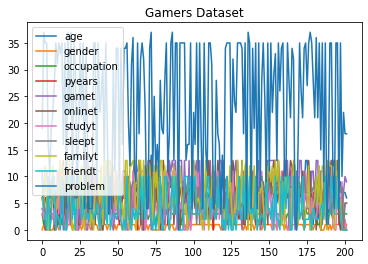

In [ ]:
#columns = iris.columns.drop(['class'])
# create x data
x_data = range(0, df.shape[0])
# create figure and axis
fig, ax = plt.subplots()
# plot each column
for column in x:
    ax.plot(x_data, df[column], label=column)
# set title and legend
ax.set_title('Gamers Dataset')
ax.legend()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f079de1eef0>,
      dtype=object)

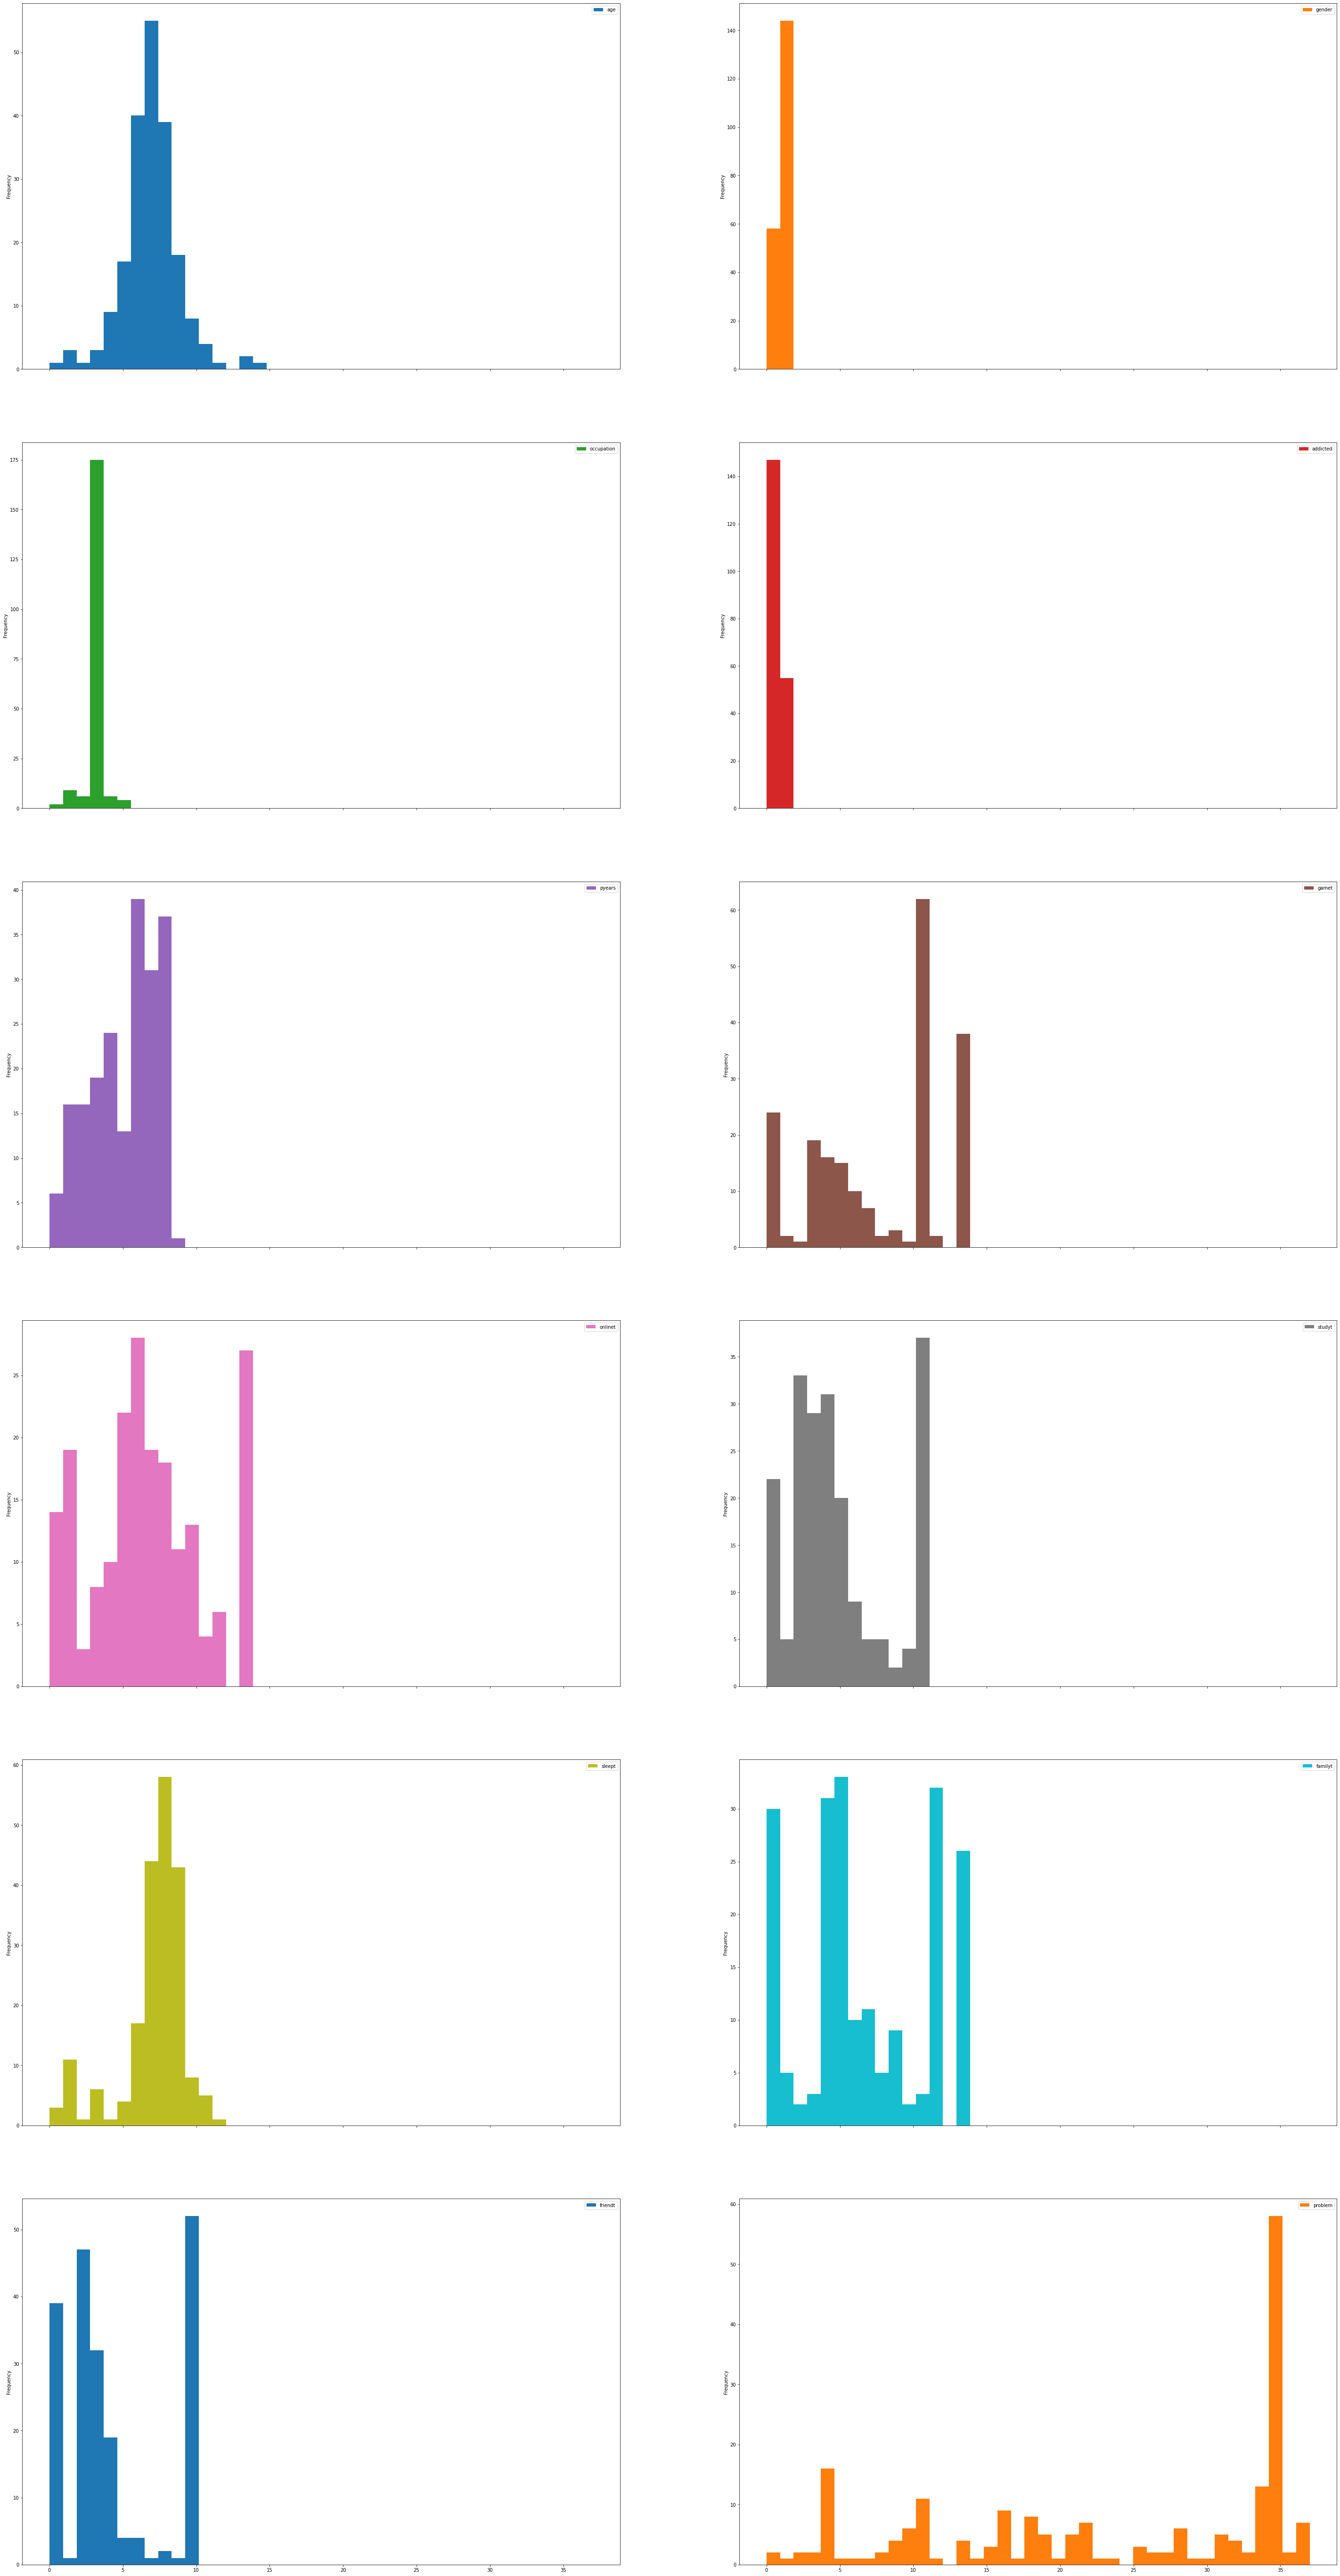

In [ ]:
df.plot.hist(subplots=True, layout=(6,2), figsize=(50, 100), bins=40)

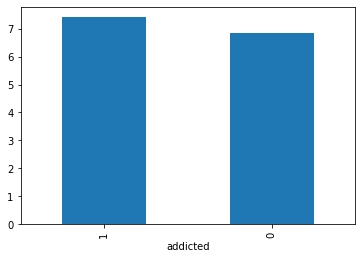

In [ ]:
df.groupby("addicted").age.mean().sort_values(ascending=False)[:5].plot.bar()

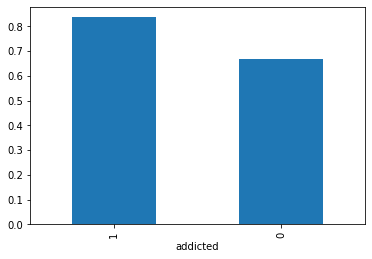

In [ ]:
df.groupby("addicted").gender.mean().sort_values(ascending=False)[:5].plot.bar()

In [ ]:
x

,age,gender,occupation,pyears,gamet,onlinet,studyt,sleept,familyt,friendt,problem
0,4,0,3,6,11,6,4,7,6,10,19
1,4,1,1,4,6,7,2,7,4,4,37
2,6,0,3,6,11,0,2,8,12,2,35
3,6,0,3,6,11,6,4,7,6,0,35
4,7,0,3,1,3,6,5,7,0,10,16
...,...,...,...,...,...,...,...,...,...,...,...
197,9,1,3,0,6,6,5,7,5,3,35
198,6,1,3,3,0,0,9,8,0,0,10
199,7,1,3,3,7,0,0,0,0,0,22
200,7,0,3,5,10,0,2,5,0,0,18


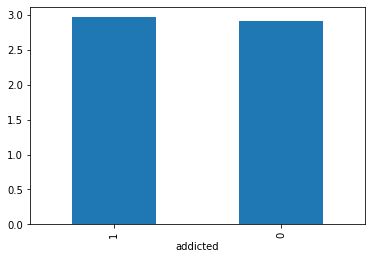

In [ ]:
df.groupby("addicted").occupation.mean().sort_values(ascending=False)[:5].plot.bar()

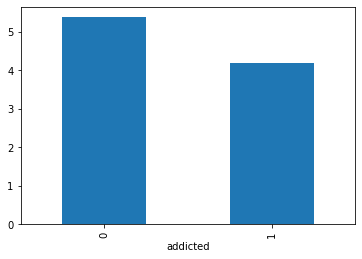

In [ ]:
df.groupby("addicted").pyears.mean().sort_values(ascending=False)[:5].plot.bar()

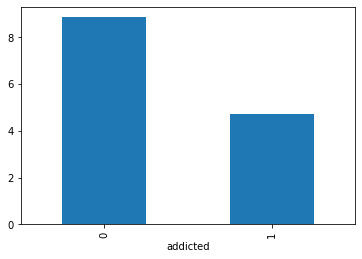

In [ ]:
df.groupby("addicted").gamet.mean().sort_values(ascending=False)[:5].plot.bar()

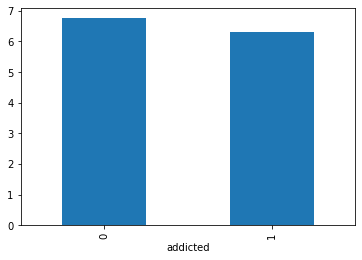

In [ ]:
df.groupby("addicted").onlinet.mean().sort_values(ascending=False)[:5].plot.bar()

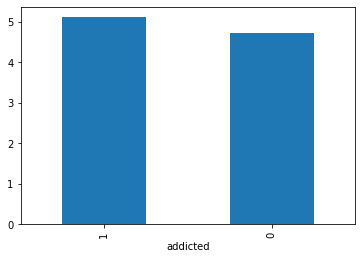

In [ ]:
df.groupby("addicted").studyt.mean().sort_values(ascending=False)[:5].plot.bar()

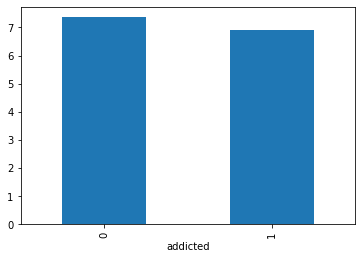

In [ ]:
df.groupby("addicted").sleept.mean().sort_values(ascending=False)[:5].plot.bar()

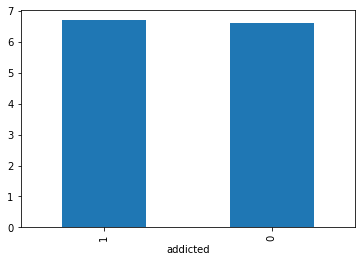

In [ ]:
df.groupby("addicted").familyt.mean().sort_values(ascending=False)[:5].plot.bar()

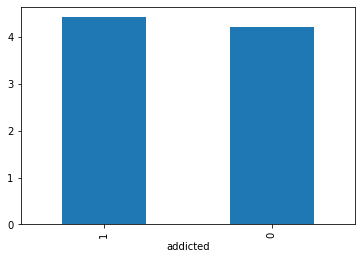

In [ ]:
df.groupby("addicted").friendt.mean().sort_values(ascending=False)[:5].plot.bar()

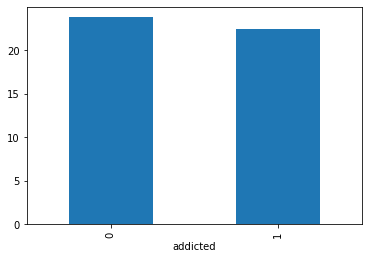

In [ ]:
df.groupby("addicted").problem.mean().sort_values(ascending=False)[:5].plot.bar()

In [ ]:
import seaborn as sns

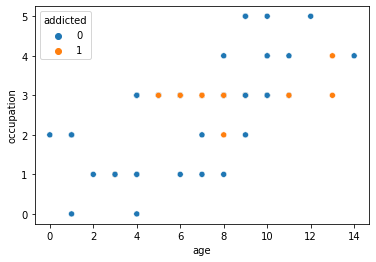

In [ ]:
sns.scatterplot(x='age', y='occupation', hue='addicted', data=df)

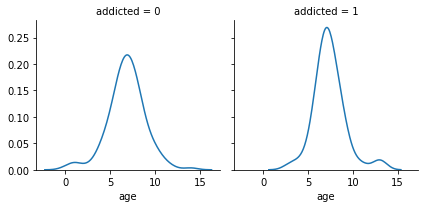

In [ ]:
g = sns.FacetGrid(df, col='addicted')
g = g.map(sns.kdeplot, 'age')

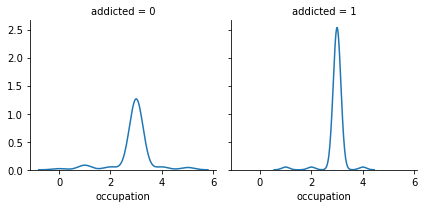

In [ ]:
g = sns.FacetGrid(df, col='addicted')
g = g.map(sns.kdeplot, 'occupation')

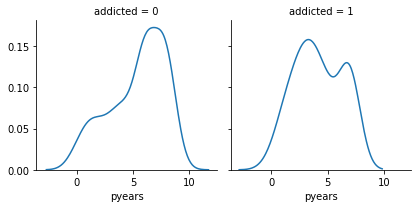

In [ ]:
g = sns.FacetGrid(df, col='addicted')
g = g.map(sns.kdeplot, 'pyears')

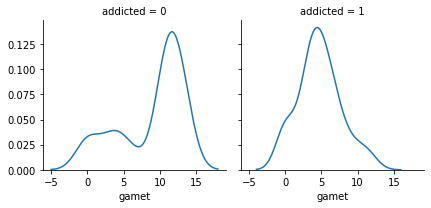

In [ ]:
g = sns.FacetGrid(df, col='addicted')
g = g.map(sns.kdeplot, 'gamet')

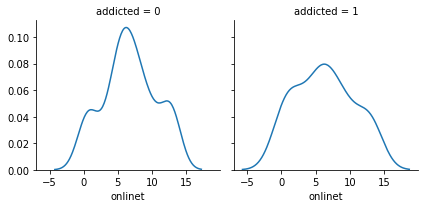

In [ ]:
g = sns.FacetGrid(df, col='addicted')
g = g.map(sns.kdeplot, 'onlinet')

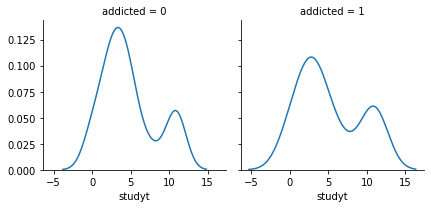

In [ ]:
g = sns.FacetGrid(df, col='addicted')
g = g.map(sns.kdeplot, 'studyt')

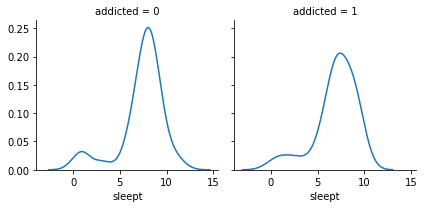

In [ ]:
g = sns.FacetGrid(df, col='addicted')
g = g.map(sns.kdeplot, 'sleept')

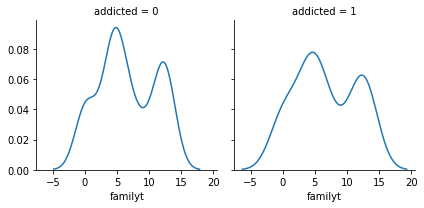

In [ ]:
g = sns.FacetGrid(df, col='addicted')
g = g.map(sns.kdeplot, 'familyt')

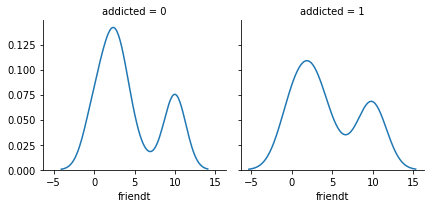

In [ ]:
g = sns.FacetGrid(df, col='addicted')
g = g.map(sns.kdeplot, 'friendt')

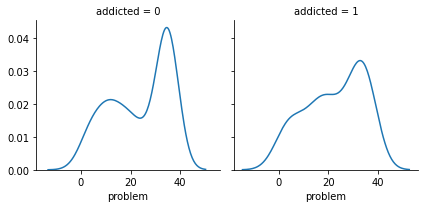

In [ ]:
g = sns.FacetGrid(df, col='addicted')
g = g.map(sns.kdeplot, 'problem')

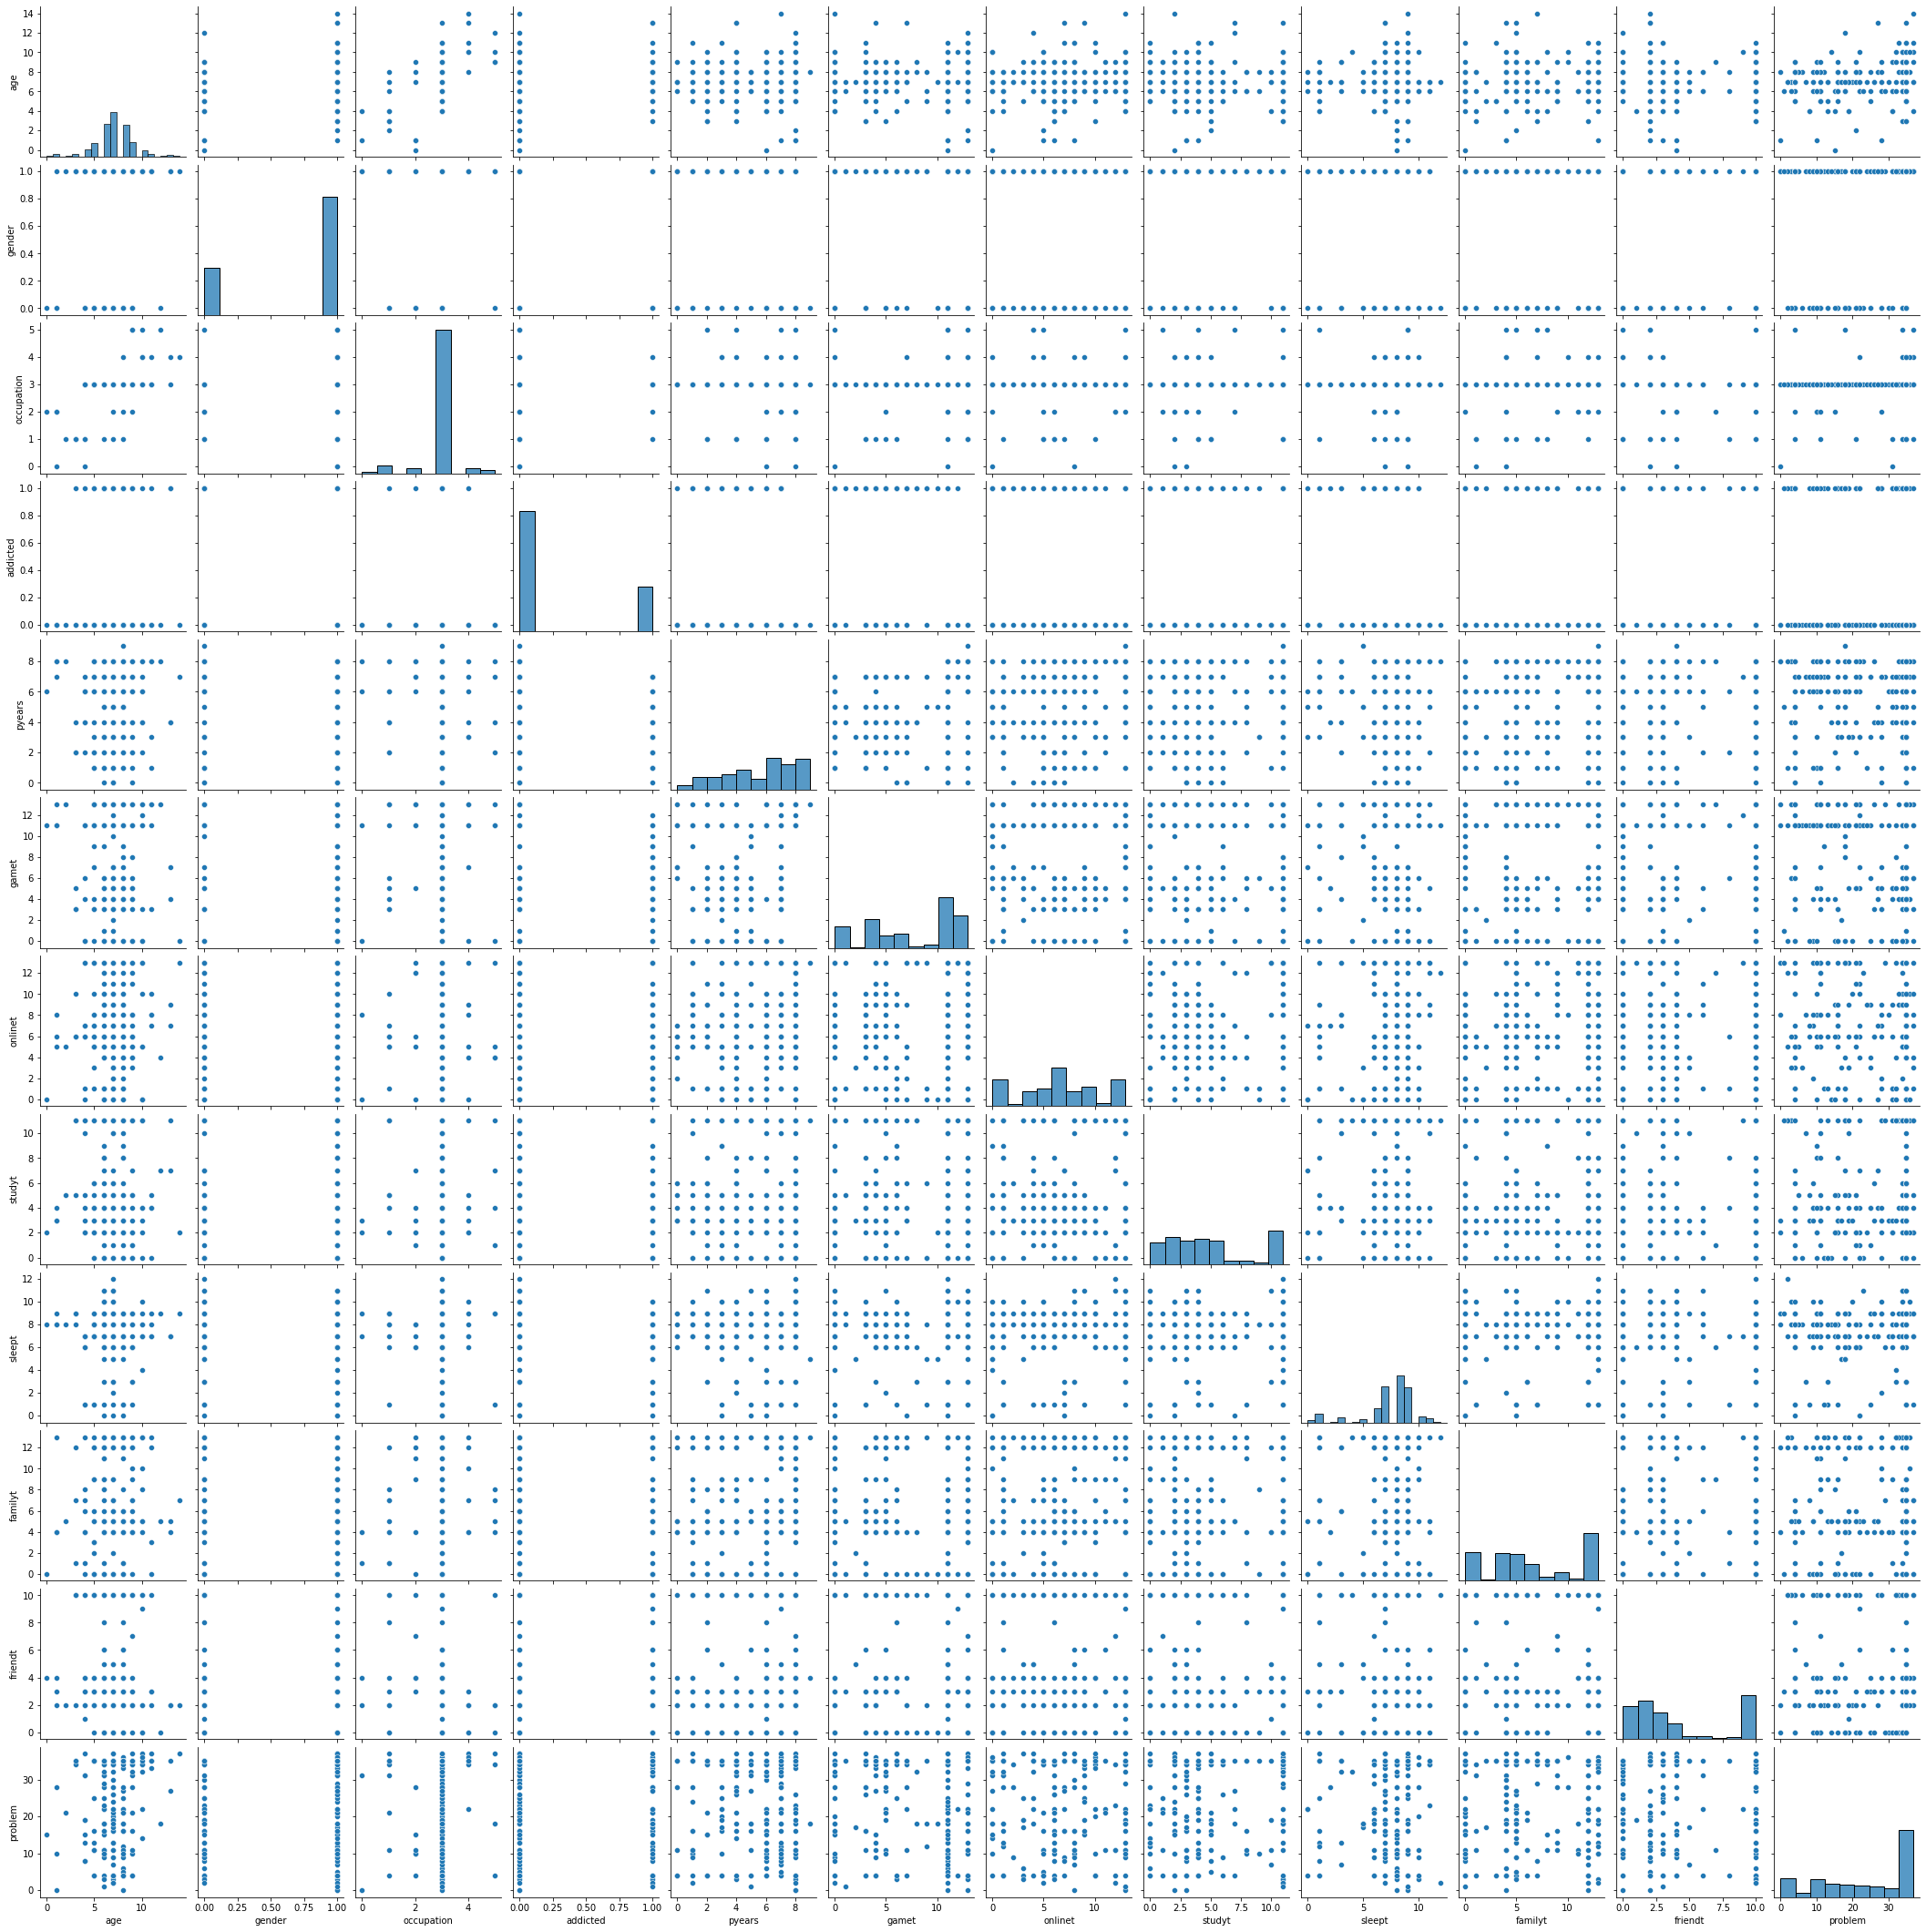

In [ ]:
sns.pairplot(df)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f078e909208>,
      dtype=object)

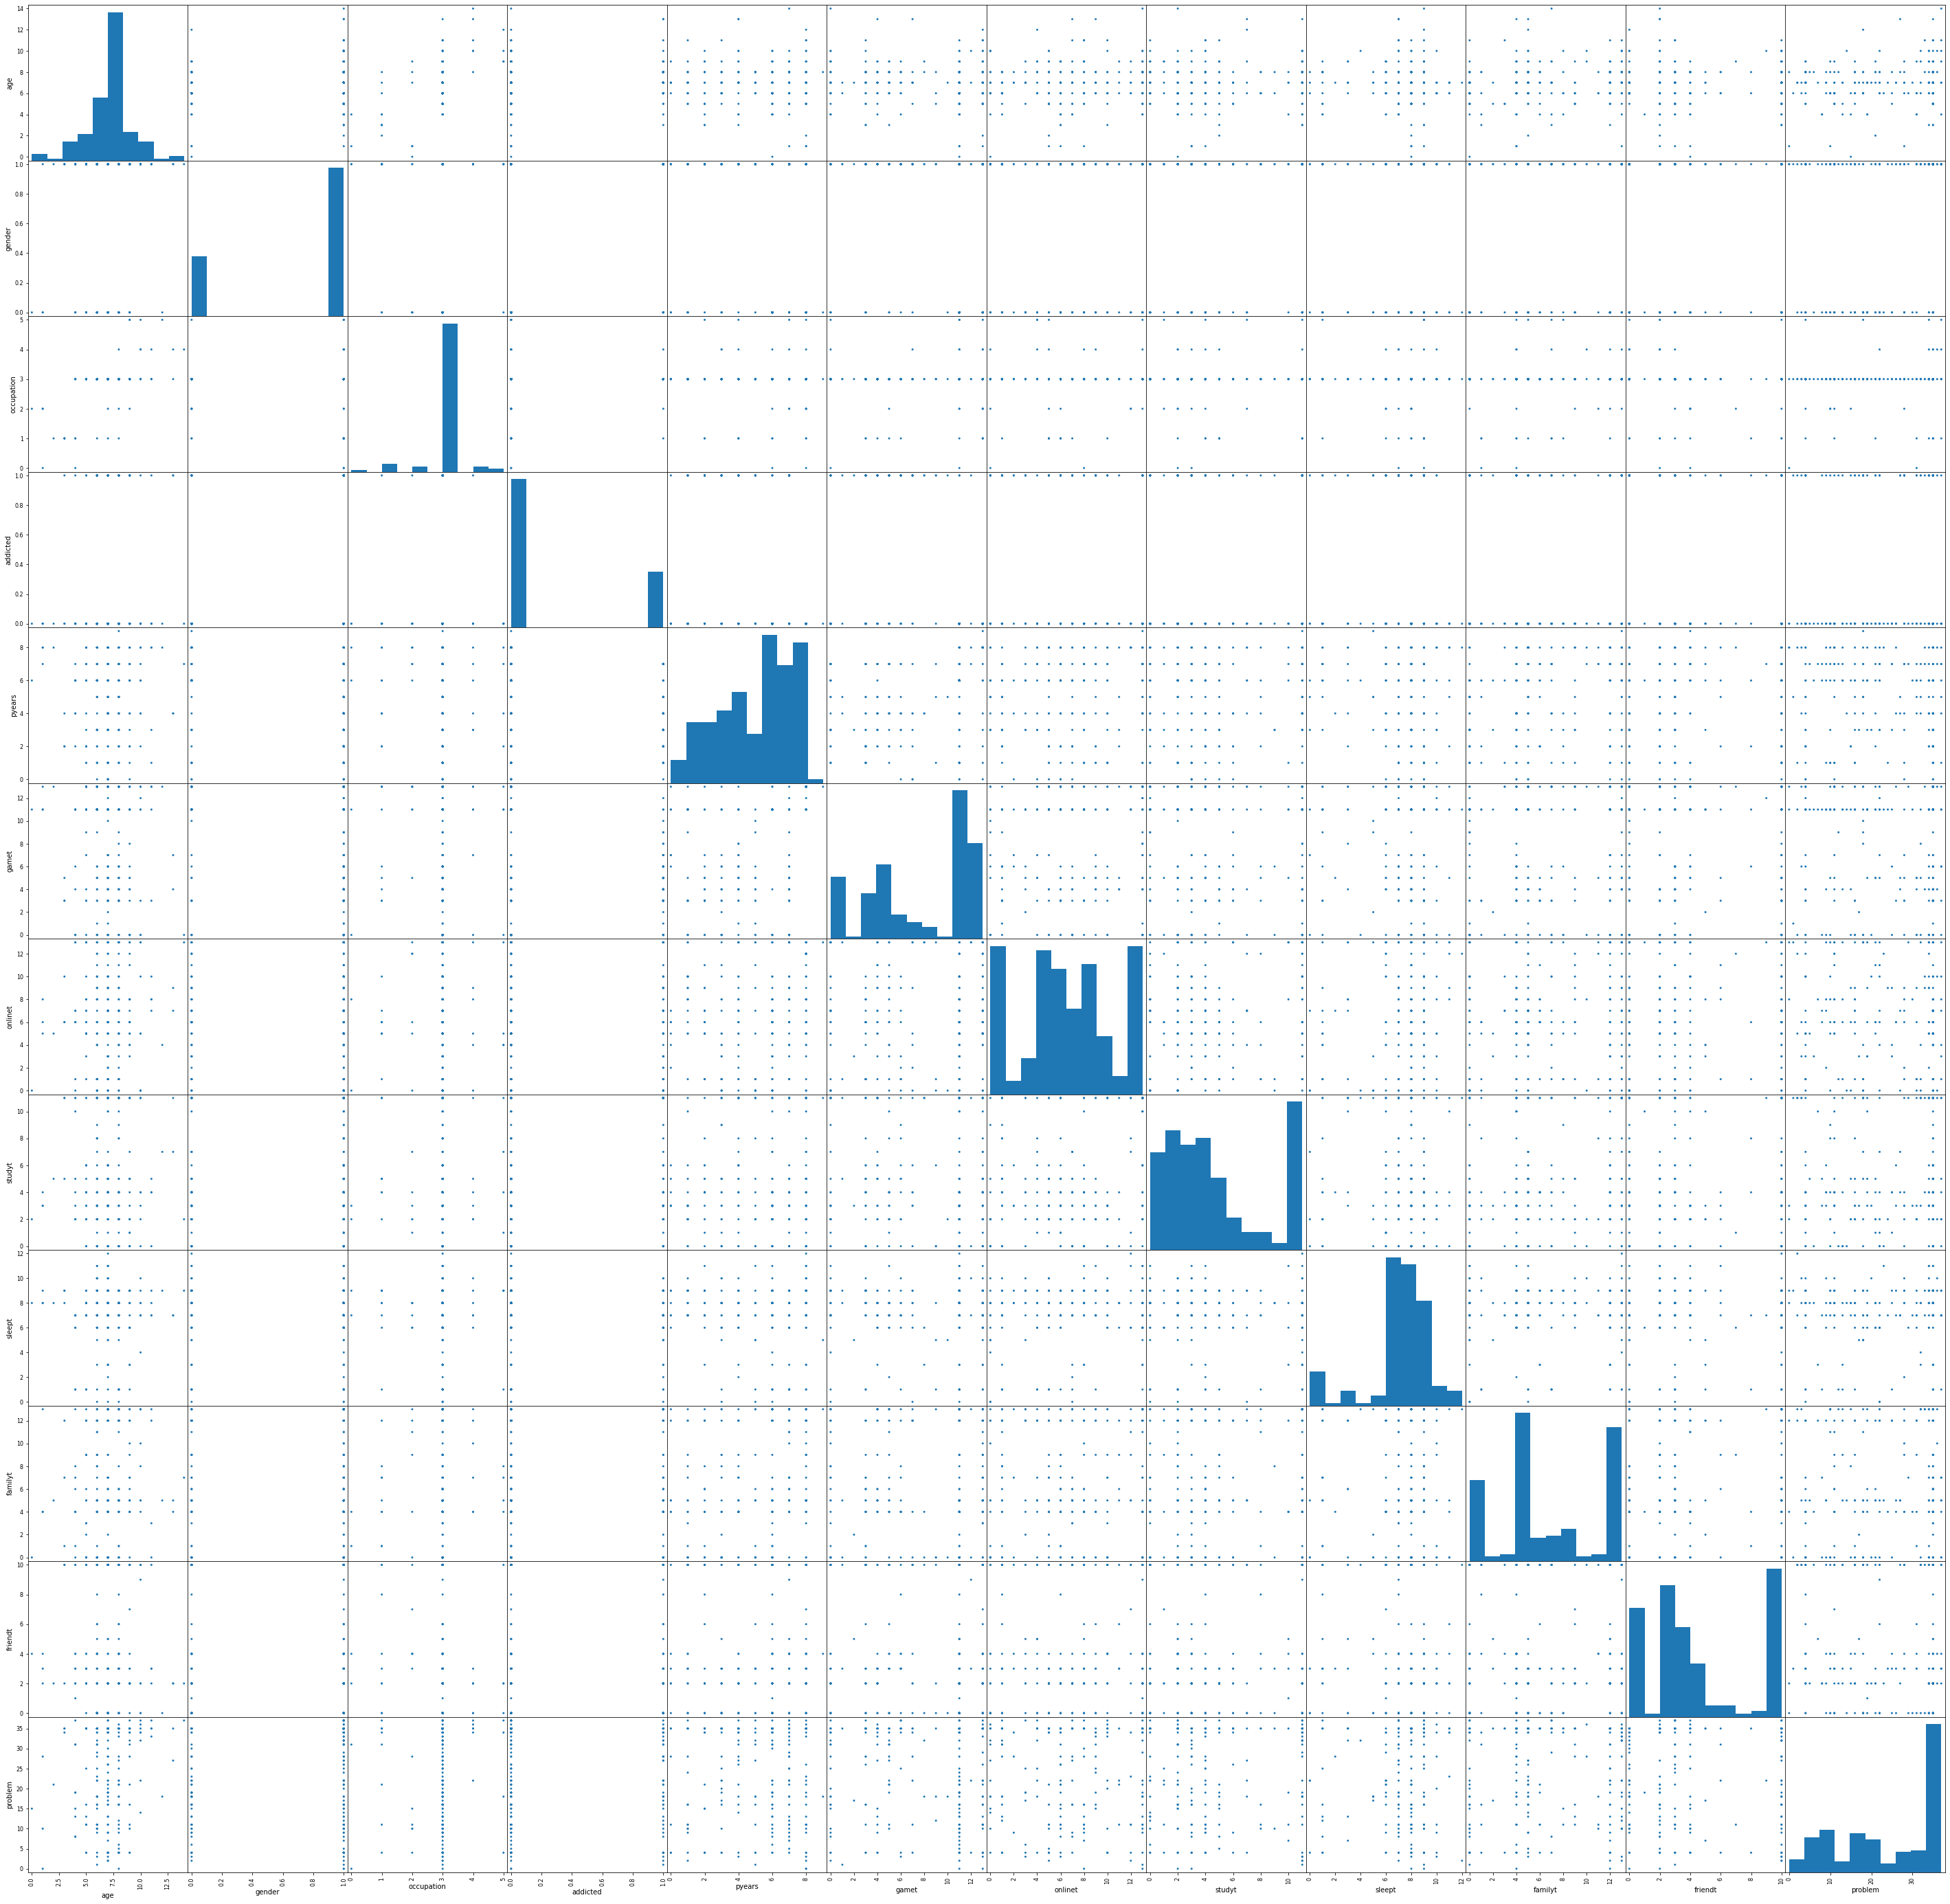

In [ ]:
from pandas.plotting import scatter_matrix

fig, ax = plt.subplots(figsize=(50,50))
scatter_matrix(df, alpha=1, ax=ax)